In [1]:
import pandas as pd

data = pd.read_csv('car_stopping_distance.csv')
data.head()

,Speed (mph),Distance (ft)
0,0.0,4.792753
1,1.0,4.250431
2,2.0,2.192925
3,2.0,19.488679
4,3.0,6.495950


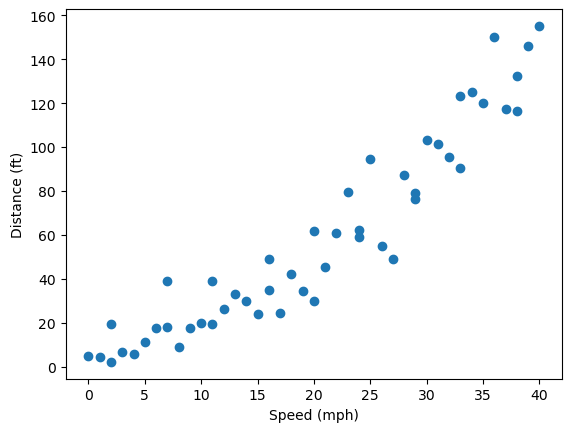

In [2]:
import matplotlib.pyplot as plt

x = data[['Speed (mph)']]
y = data['Distance (ft)']

plt.scatter(x, y)
plt.xlabel('Speed (mph)')
plt.ylabel('Distance (ft)')
plt.show()

In [3]:
neighbors = data[data['Speed (mph)'].between(32, 35)]
neighbors

,Speed (mph),Distance (ft)
39,32.0,95.454150
40,33.0,90.644673
41,33.0,123.225327
42,34.0,125.024044
43,35.0,120.063483


In [4]:
neighbors['Distance (ft)'].mean()

np.float64(110.88233537877434)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5).fit(x, y)

knn.predict([[33.5]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([110.88233538])

In [6]:
knn_w = KNeighborsRegressor(n_neighbors=5, weights='distance').fit(x, y)

knn_w.predict([[33.5]])

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([112.01816038])

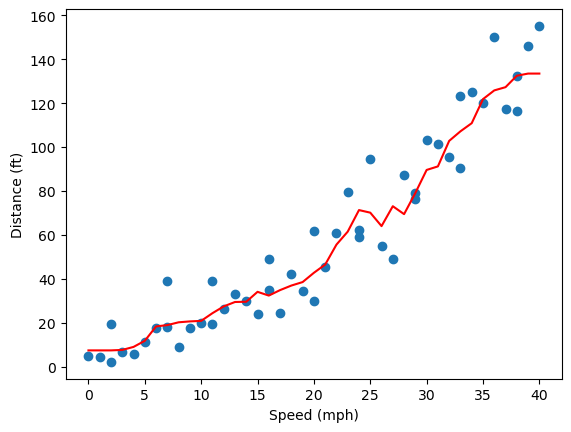

In [7]:
y_pred = knn.predict(x)

plt.scatter(x, y)
plt.plot(x, y_pred, 'red')
plt.xlabel('Speed (mph)')
plt.ylabel('Distance (ft)')
plt.show()

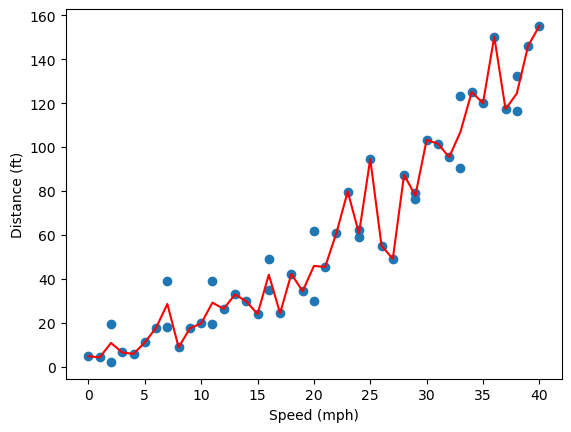

In [9]:
def fitting(k, w):
    knn_fit = KNeighborsRegressor(n_neighbors=k, weights=w)
    knn_fit.fit(x, y)
    
    y_pred = knn_fit.predict(x)
    
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'red')
    plt.xlabel('Speed (mph)')
    plt.ylabel('Distance (ft)')
    plt.show()

fitting(k=10, w='distance')   

In [10]:
from ipywidgets import interact

interact(fitting, k=(1, 50), w=['distance', 'uniform'])

interactive(children=(IntSlider(value=25, description='k', max=50, min=1), Dropdown(description='w', options=(…

<function __main__.fitting(k, w)>

In [ ]:
def fitting(k, w):
    knn_fit = KNeighborsRegressor(n_neighbors=k, weights=w)
    knn_fit.fit(x, y)
    
    y_pred = knn_fit.predict(x)
    
    plt.scatter(x, y)
    plt.plot(x, y_pred, 'red')
    plt.xlabel('Speed (mph)')
    plt.ylabel('Distance (ft)')
    plt.show()

fitting(k=10, w='distance') 